Copper pair box hamiltonian:

$\hat{H} = 4E_c (\hat{n}-n_g)^2 - E_j \cos(\hat{\theta})$

[ -7.62805475  -3.05117844   1.1627632    4.99398186   7.9134109
  11.86073227  12.34887374  19.85978404  19.89740772  30.40128967
  30.44858906  43.46408077  43.52129025  58.98070877  59.04816695
  76.92531069  77.03408488  97.28613777  98.43601094 120.07424764
 146.12166286]
[ -7.62805308  -3.0512697    1.16492225   4.96492912   8.06961149
  10.97193567  13.4220548   18.0865315   21.77944977  28.11032755
  32.83999832  40.6815758   46.40182781  55.71510168  62.41078538
  73.18018281  80.8738247   93.0632582  102.73495682 115.37551378
 140.96053535]


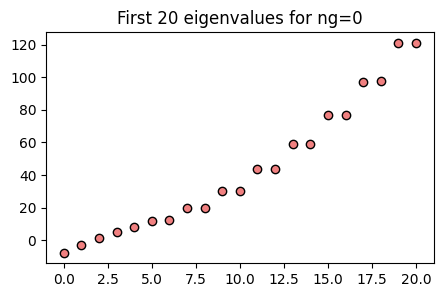

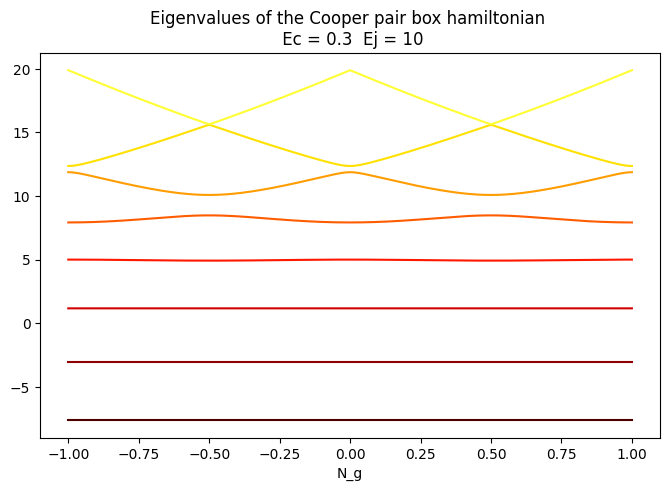

'\n# Compute differences between adjacent eigenvalues\nftr = np.diff(eigv, axis=1)\n\n# Plot differences\nplt.figure(22)\nplt.subplot(311)\nplt.plot(NG, ftr[:, 0])\nplt.subplot(312)\nplt.plot(NG, ftr[:, 1])\nplt.subplot(313)\nplt.plot(NG, ftr[:, 0] - ftr[:, 1])\nplt.show()\n\n# Plot detailed differences\nplt.figure(33)\nplt.subplot(311)\nplt.plot(NG, (ftr[:, 0] - np.mean(ftr[:, 0])) * 1e6)\nplt.subplot(312)\nplt.plot(NG, (ftr[:, 1] - np.mean(ftr[:, 1])) * 1e6)\nplt.subplot(313)\nplt.plot(NG, ftr[:, 0] - ftr[:, 1])\nplt.show()\n\n'

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh

# Parameters
N = 20
n = np.arange(-N/2, N/2 + 1)  # Equivalent to MATLAB's -N/2:N/2
Ec = 0.3
Ej = 10

# Josephson energy matrix Hj
Hj = -Ej * (np.diag(np.ones(N), 1) + np.diag(np.ones(N), -1)) / 2

# Discretized charge offset range NG
NGlen = 1001
NG = np.linspace(-1, 1, NGlen)

# To store eigenvalues
eigv = np.zeros((NGlen, N+1))

# Function to compute eigenvalues for each ng
def compute_eigenvalues(k):
    ng = NG[k]
    Hc = Ec * np.diag(4 * (ng - n) ** 2)
    H = Hc + Hj
    v, _ = eigh(H)  # Compute eigenvalues using scipy's eigh
    return v

# Save all eigenvalues for each ng
for k in range(NGlen):
    v = compute_eigenvalues(k) 
    for j in range(N+1):
        eigv[k, j] = v[j]


print(compute_eigenvalues(1))
print(compute_eigenvalues(100))

# Plot eigenvalues for ng = 0
plt.figure(figsize=(5, 3))
plt.plot(compute_eigenvalues(501), color = 'lightcoral', marker ='o', markeredgecolor='black', markeredgewidth=1,linestyle='none')
plt.title(f"First {N} eigenvalues for ng=0")


# Plot eigenvalues
Neigen = 8
# Create a gradient of colors
cmap = plt.get_cmap('hot') # Spectral, hot, rainbow, YlOrBr_r, viridis, cividis, inferno
colors = [cmap(i / Neigen*0.8) for i in range(1, Neigen+1)]

plt.figure(figsize=(8, 5))
for k in range(Neigen):
    plt.plot(NG, eigv[:, k], color = colors[k], label=f'En {k}')

plt.title(f'Eigenvalues of the Cooper pair box hamiltonian \n Ec = {Ec}  Ej = {Ej}')
plt.xlabel("N_g")
#plt.legend()
plt.show()

'''
# Compute differences between adjacent eigenvalues
ftr = np.diff(eigv, axis=1)

# Plot differences
plt.figure(22)
plt.subplot(311)
plt.plot(NG, ftr[:, 0])
plt.subplot(312)
plt.plot(NG, ftr[:, 1])
plt.subplot(313)
plt.plot(NG, ftr[:, 0] - ftr[:, 1])
plt.show()

# Plot detailed differences
plt.figure(33)
plt.subplot(311)
plt.plot(NG, (ftr[:, 0] - np.mean(ftr[:, 0])) * 1e6)
plt.subplot(312)
plt.plot(NG, (ftr[:, 1] - np.mean(ftr[:, 1])) * 1e6)
plt.subplot(313)
plt.plot(NG, ftr[:, 0] - ftr[:, 1])
plt.show()

'''


[[1640.   -10.     0.  ...    0.     0.     0. ]
 [ -10.  1568.8  -10.  ...    0.     0.     0. ]
 [   0.   -10.  1499.2 ...    0.     0.     0. ]
 ...
 [   0.     0.     0.  ... 1499.2  -10.     0. ]
 [   0.     0.     0.  ...  -10.  1568.8  -10. ]
 [   0.     0.     0.  ...    0.   -10.  1640. ]]
(91, 91)


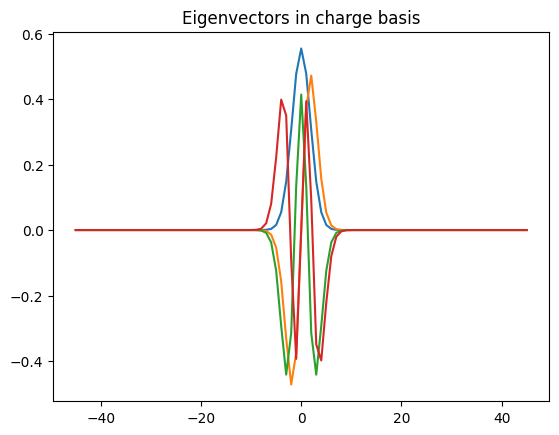

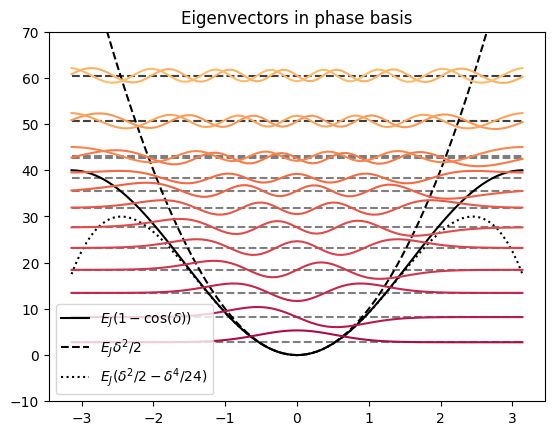

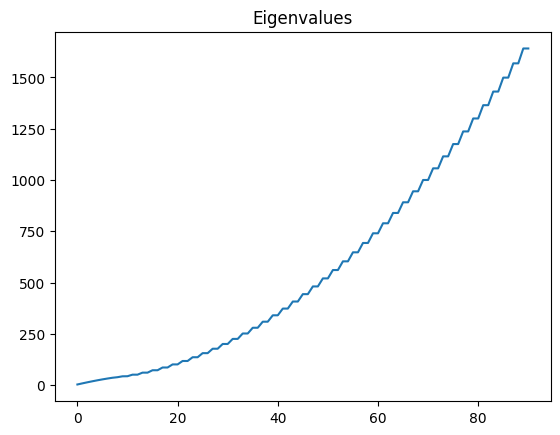

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
Ec = 0.2
Ej = 20
N = 90
n = np.arange(-N/2, N/2 + 1)

ng = 0

#Ej=13000
#Ec=300
#ng=0.001

# Hamiltonian components
Hc = Ec * np.diag(4 * (ng - n) ** 2) # Energía condensador
#Hj = -Ej * (np.diag(np.ones(N), 1) + np.diag(np.ones(N), -1)) / 2 # Representacion matricial de cos(delta). Energía unión Josephson
Hj = Ej * np.diag(np.ones(N+1), 0) -Ej * (np.diag(np.ones(N), 1) + np.diag(np.ones(N), -1)) / 2 # Representacion matricial de 1-cos(delta). Energía unión Josephson
H = Hc + Hj

#print(Hc)
#print(Hj)
print(H)

# Eigenvalue decomposition
eigenvalues, eigenvectors = np.linalg.eigh(H)
En = np.real(eigenvalues)  # Extract real part of eigenvalues
ss = eigenvectors[:, :4]  # First 4 eigenvectors

print(np.shape(eigenvectors))
#print(En)
#print(eigenvectors[:,1])
# Q matrix computation
#Q = np.dot(ss.T, ss * n[:, np.newaxis].T)
#result = Q[1, 2] / Q[0, 1]

#print(f"Q[2, 3] / Q[1, 2]: {result}")

# Plot eigenvectors
plt.figure(2)
plt.plot(n, ss)
plt.title('Eigenvectors in charge basis')
plt.show()

# FFT and plot
ffts = np.fft.fftshift(np.fft.fft(np.fft.ifftshift(eigenvectors, axes=0), axis=0), axes=0)
phi = np.linspace(-np.pi, np.pi, N+1)

# Create a gradient of colors
cmap = plt.get_cmap('Spectral') # Spectral, hot, rainbow, YlOrBr_r, viridis, cividis, inferno
colors = [cmap(i / len(En)*2) for i in range(1, len(En)+1)]

plt.figure(3)
plt.clf()
plt.plot(phi, (1-np.cos(phi)) * Ej, 'k', label='$E_J(1-\cos(\delta))$') # Potential cos()
plt.plot(phi, phi**2 * Ej /2, 'k--', label='$E_J\delta^2/2$') # Harmonic potential
plt.plot(phi, phi**2 * Ej /2 - Ej * phi**4 /24, 'k:', label='$E_J(\delta^2/2 - \delta^4/24)$') # Taylor expansion of cos()
for i in range(len(En)): plt.plot(phi, np.ones(len(phi)) * En[i] ,'k--', alpha=0.5) 
#for i in range(len(En)): plt.plot(phi, 5*eigenvectors[:,i] + En[i] ) # Multiplied by 5 to better visualization Eigenvectors in charge basis
#for i in range(len(En)): plt.plot(phi, np.real(ffts[i]) + En[i] )
for i in range(len(En)): 
    ffts = np.fft.fftshift(np.fft.fft(np.fft.ifftshift(eigenvectors[:,i], axes=0), axis=0), axes=0)
    plt.plot(phi, np.real(ffts) + np.imag(ffts) + En[i], color=colors[i]) # Eigen vectors in phase basis, distribution in real or imaginary part, not in both
plt.ylim(-10,70)

plt.title('Eigenvectors in phase basis')
plt.legend()
plt.show()


# Plot eigenvalues
plt.figure(4)
plt.plot(En)
plt.title('Eigenvalues')
plt.show()


In [9]:
def psi_k(evecs, k, nlevels, pts=1001):
    """
    Return the wavevector of the CPB Hamiltonian in the flux basis. Made
    compact over the interval of [-pi, pi]

    Args:
        evecs (2D array): Matrix of eigenvectors where each column is an eigenstate.
        k (int): Index of the eigenstate to compute.
        nlevels (int): Number of charge basis states (i.e., from -nlevels to +nlevels).
        pts (int): Number of points to sample in the interval [-pi, pi]. Defaults to 1001.

    Returns:
        psi (1D array): The wavefunction in the flux basis.
        phi (1D array): The flux values corresponding to the wavefunction.
    """
    phi = np.linspace(-np.pi, np.pi, pts)  # Create flux values
    evec = evecs[:, k]  # Select the k-th eigenstate
    print(np.size(evec))
    n = np.arange(-nlevels, nlevels + 1)  # Charge states
    psi = []
    # Compute the wavefunction as a sum of Fourier components
    for i, val in enumerate(n):
            # Get Fourier component of each charge basis state
            print(i,val)
            psi.append(evec[i] * np.exp(1j * val * phi))
    print(len(psi[0]))
    psi = np.array(psi)
    print(np.size(psi))

    # Sum over Fourier components to get eigenwave
    psi = np.sum(psi, axis=0) / np.sqrt(2 * np.pi)
    print(len(psi))
    # Normalize Psi
    norm = np.sqrt(np.dot(psi, psi.conj()))
    psi = psi / norm
    print(len(psi))

    return psi, phi


91
0 -3
1 -2
2 -1
3 0
4 1
5 2
6 3
1001
7007
1001
1001


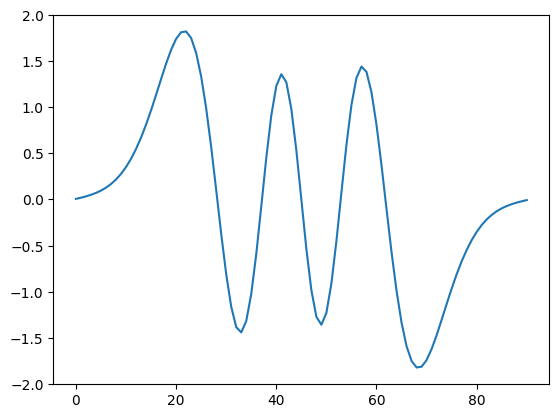

In [10]:
psi, phi = psi_k(eigenvectors, 1, 3, pts=1001)
#print(eigenvectors[:,1])
#print(phi)
ffts = np.fft.fftshift(np.fft.fft(np.fft.ifftshift(eigenvectors[:,5], axes=0), axis=0), axes=0)
plt.plot(np.real(ffts) + np.imag(ffts))